<a href="https://colab.research.google.com/github/NJena404/Bitcoin-price-prediction/blob/main/Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('/content/BTC-USD.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-22,1120.650024,1120.650024,1014.210022,1049.140015,1049.140015,380840992
1,2017-03-23,1050.050049,1058.010010,1028.930054,1038.589966,1038.589966,248540000
2,2017-03-24,1038.449951,1040.469971,934.357971,937.520020,937.520020,491038016
3,2017-03-25,936.539978,975.760986,903.713013,972.778992,972.778992,435803008
4,2017-03-26,974.015015,1007.960022,954.185974,966.724976,966.724976,303668000


In [10]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1777,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
1222,2020-07-26,9680.234375,10023.807617,9652.847656,9905.166992,9905.166992,20507998997
1744,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
1608,2021-08-16,47019.960938,47998.097656,45700.320313,46004.484375,46004.484375,32776876610
231,2017-11-08,7141.379883,7776.419922,7114.020020,7459.689941,7459.689941,4602200064


In [11]:
df.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1827 non-null   object 
 1   Close   1827 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


In [13]:
df.head()

,Date,Close
0,2017-03-22,1049.140015
1,2017-03-23,1038.589966
2,2017-03-24,937.520020
3,2017-03-25,972.778992
4,2017-03-26,966.724976


In [14]:
df.describe()

,Close
count,1827.000000
mean,17259.392759
std,17465.529005
min,937.520020
25%,6377.244873
50%,9180.962891
75%,23359.320312
max,67566.828125


EDA AND FEATURE ENGINEERING

Text(0, 0.5, 'Price')

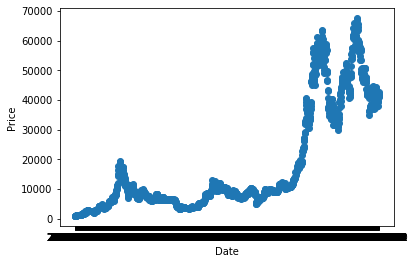

In [15]:
plt.scatter(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')

The above figure shows that the data is non linear.If we fit the data into linear regression model then the prediction model will not be considered as a good model.(But we will do that for testing purpose)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1827 non-null   object 
 1   Close   1827 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


In [17]:
price=df['Close']

In [18]:
price

0        1049.140015
1        1038.589966
2         937.520020
3         972.778992
4         966.724976
            ...     
1822    41801.156250
1823    42190.652344
1824    41247.824219
1825    41077.996094
1826    42607.613281
Name: Close, Length: 1827, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
norm_data=min_max.fit_transform(price.values.reshape(-1,1))

In [20]:
norm_data

array([[0.00167524],
       [0.0015169 ],
       [0.        ],
       ...,
       [0.60499359],
       [0.60244474],
       [0.62540186]])

In [21]:
df['Close']=norm_data
df

,Date,Close
0,2017-03-22,0.001675
1,2017-03-23,0.001517
2,2017-03-24,0.000000
3,2017-03-25,0.000529
4,2017-03-26,0.000438
...,...,...
1822,2022-03-18,0.613298
1823,2022-03-19,0.619144
1824,2022-03-20,0.604994
1825,2022-03-21,0.602445


In [22]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [23]:
df

,Date,Close
0,736410,0.001675
1,736411,0.001517
2,736412,0.000000
3,736413,0.000529
4,736414,0.000438
...,...,...
1822,738232,0.613298
1823,738233,0.619144
1824,738234,0.604994
1825,738235,0.602445


SPLITTING DATA FOR TRAIN AND TEST

In [24]:
x=df.drop(columns=['Close'])
y=df['Close']
print(x.shape)
print(y.shape)

(1827, 1)
(1827,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1278, 1)
(549, 1)
(1278,)
(549,)


LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

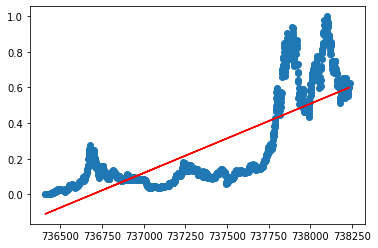

In [27]:
plt.scatter(df['Date'],df['Close'])
plt.plot(x_train,lr.predict(x_train),color='red')

Horrible model as we know before that our data is not linear.

MODEL EVALUATION

In [28]:
from sklearn.metrics import r2_score
r2_score(pred1,y_test)

0.4027734222862783

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred1)

0.025448831838281068

RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)
pred3 = regr.predict(x_test)

In [31]:
print(mean_squared_error(y_test,pred3))
print(r2_score(y_test,pred3))

0.00551318673737834
0.9169003915940335


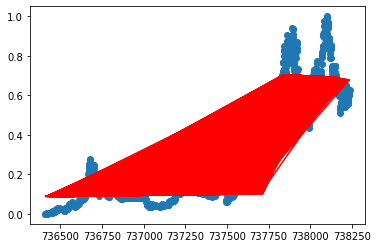

In [32]:
plt.scatter(df['Date'],df['Close'])
plt.plot(x_train,regr.predict(x_train),color='red')

DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)
pred4=dtr.predict(x_test)

In [34]:
print(mean_squared_error(y_test,pred4))
print(r2_score(y_test,pred4))

0.00021051605247867207
0.9968269165625131


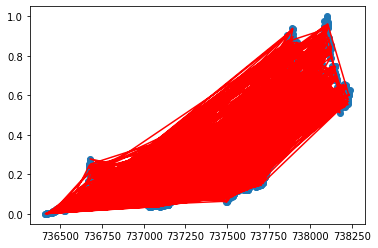

In [35]:
plt.scatter(df['Date'],df['Close'])
plt.plot(x_train,dtr.predict(x_train),color='red')

**Random forest and Decision tree both models are giving a good accuracy.**